# Plotting with fed3

## Import `fed3.plot`

The plotting package within fed3, `fed3.plot` is not imported by default.  Make an explicit call to import it:

In [1]:
import fed3
import fed3.plot as fplot

For the purposes of this documentation, matplotlib will be used to set the default figure size.

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [7, 5]
matplotlib.rcParams['figure.dpi'] = 100

## Example data

The following sections will make use of some example data, provided by the [`fed3.examples`](https://earnestt1234.github.io/fed3/fed3/examples/index.html) package:

In [3]:
feds = fed3.load_examples('justin')
f = feds[0]

## Basic plotting

The following section will intoduce the basics of plotting with fed3.  

### The "Hello World" plot

The simplest plot is the [line plot](https://earnestt1234.github.io/fed3/fed3/plot/simple.html#fed3.plot.simple.line), which plots a variable of interest over time.  This demonstrates the syntax that applies to almost all plotting functions: pass the data to be plotted as the first argument (the FEDFrame(s)) followed by any options.  In this case, the `y` parameter specifies the variable to be plotted: 

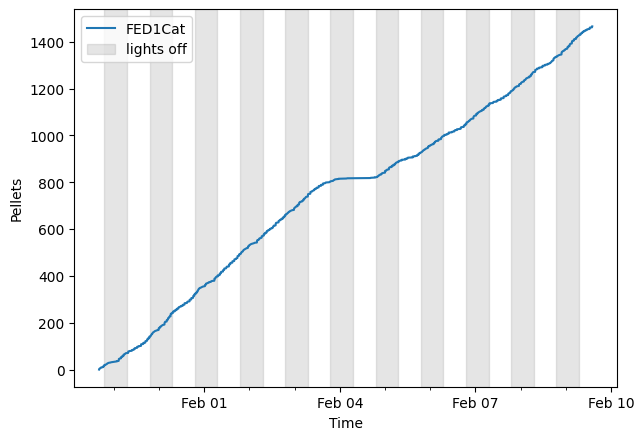

In [4]:
fig = fplot.line(f, y='pellets')

Many other `y` values can be specified - they link to the functions defined within [`fed3.metrics`](https://earnestt1234.github.io/fed3/fed3/metrics/index.html).  Call [`fed3.list_metrics()`](https://earnestt1234.github.io/fed3/fed3/index.html#fed3.list_metrics) to see all available options.

### Plotting multiple FEDs

Most plots are able to plot data from multiple FEDs, either as separate or aggregated curves.  The structure of the passed data determines this behavior:

- A single FEDFrame ([`fed3.core.fedframe.FEDFrame`](https://earnestt1234.github.io/fed3/fed3/core/fedframe.html#fed3.core.fedframe.FEDFrame)) specifies a single line to be plotted (as shown above)
- A `list` (or other 1D collection) of FEDFrames will plot each as separate curves
- A `dict` is used to aggregate data.  Within each dictionary, the key is the group label, and the value is the collection of FEDFrames belonging to that group.

#### List of FEDs

The following is an example of the second option - data for each FED are plotted as individual lines.

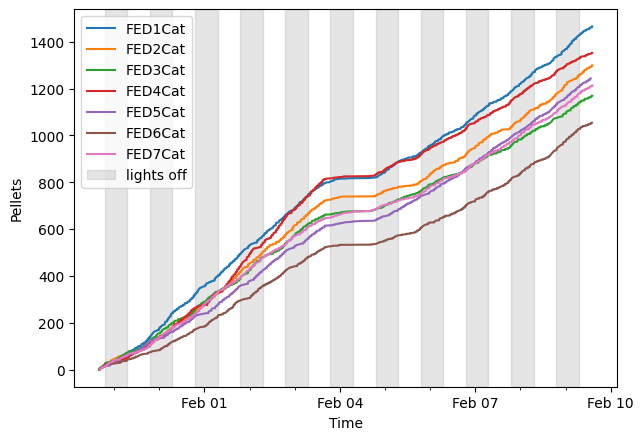

In [5]:
fig = fplot.line(feds, y='pellets')

#### Grouping

To create a group average, pass a dictionary indicating group membership:

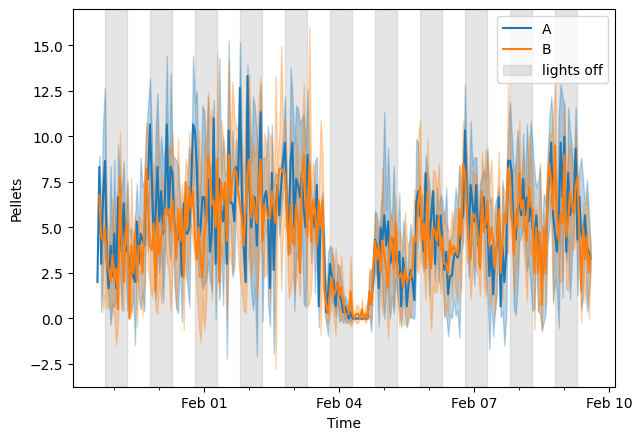

In [7]:
groups = {'A' : feds[0:3], 'B' : feds[3:]}

fig = fplot.line(groups, y='pellets')

A few things have changed in the above plot:

- There are two curves plotted only; one for each member of the dictionary passed.  The curves correspond to the average pellet retrieval, and the shaded error bar correspond to the standard deviation.
- The measure of pellet retrieval has changed from cumulative to absolute.  The y-axis corresponds to the number of pellets retrieved (on average) within each temporal bin (by default, 1 hour).

There are options to tweak the behavior for grouping.  `agg` sets the aggregation method for the grouped data, and `var` sets the measure of error.  Furthermore, the `bins` parameter sets the resolution of temporal averaging:

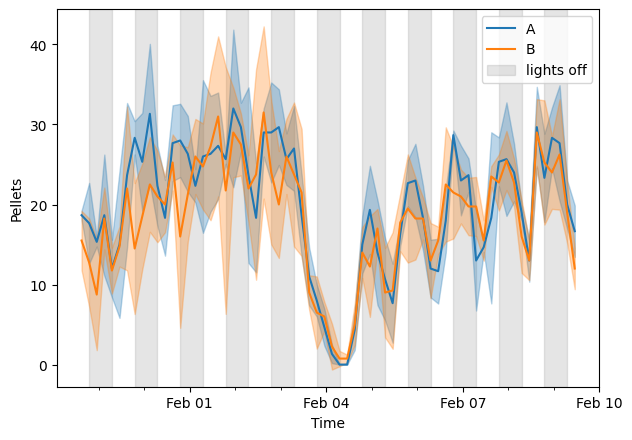

In [11]:
fig = fplot.line(groups, bins='4H')